In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# function to take image and convert it to numpy array

In [3]:
def npimage(s):
    image_ = Image.open(s)
    image_c = image_.convert('L')
    image = np.array(image_c)
    image = image.astype(np.float64)
    return image

# scale function to constrict pixel values to 0 to 255

In [4]:
def scale(image):
    current_max = np.max(image)
    current_min = np.min(image)
    scaled_image = ((image-current_min) / (current_max-current_min)) * 255
    return scaled_image

# convolution of image with haar scaling function and haar wavelet in vertical direction

In [5]:
def con_v(image, highpass=False):
    if highpass:
        return (image[:, 0::2] - image[:, 1::2]) / np.sqrt(2)
    else:
        return (image[:, 0::2] + image[:, 1::2]) / np.sqrt(2)

# convolution of image with haar scaling function and haar wavelet in horizontal direction

In [6]:
def con_h(image, highpass=False):
    if highpass:
        return (image[0::2] - image[1::2]) / np.sqrt(2)
    else:
        return (image[0::2] + image[1::2]) / np.sqrt(2)

# dwt of image at Level "level" using function con_v and con_h

In [18]:
def dwt(image, level):
    n,m=image.shape
    r=np.zeros((n, m),dtype=np.float64)
    
    lf = con_v(con_h(image),True)
    fl = con_v(con_h(image,True))
    ff = con_v(con_h(image,True),True)
    
    if level == 1:
        ll = con_v(con_h(image))
    else:
        ll = dwt(con_v(con_h(image)), level -1)
    
    
    r[0:n//2, 0:m//2] = ll
    r[n//2:n, 0:m//2] = lf
    r[0:n//2, m//2:m] = fl
    r[n//2:n, m//2:m] = ff

    return r

# idwt of dwt of image

In [25]:
def idwt(image, level):
    n, m = image.shape
    
    r1 = np.zeros((n//2,m),dtype=np.float64)
    r2 = np.zeros((n//2,m),dtype=np.float64)
    r = np.zeros((n,m),dtype=np.float64)
    
    lf = image[0:n//2, m//2:m]
    fl = image[n//2:n, 0:m//2]
    ff = image[n//2:n, m//2:m]
    
    if level == 1:
        ll = image[0:n//2, 0:m//2]
    else:
        ll = idwt(image[0:n//2, 0:m//2],level - 1)
        
    r1[:, 0::2] = (ll + fl) / np.sqrt(2)
    r1[:, 1::2] = (ll - fl) / np.sqrt(2)
    r2[:, 0::2] = (lf + ff) / np.sqrt(2)
    r2[:, 1::2] = (lf - ff) / np.sqrt(2)

        
    r[0::2, :] = (r1 + r2) / np.sqrt(2)
    r[1::2, :] = (r1 - r2) / np.sqrt(2)

    return r


# testing of above code

In [47]:
image=npimage("C:\\Users\\garvi\\images\\vishal.jpg")

In [48]:
level = 2
dwt_i=dwt(image,level)
idwt_i=idwt(dwt_i,level)

In [49]:
mse = np.mean((scale(idwt_i) - image) ** 2)

In [50]:
print(mse)

15.744236284095456


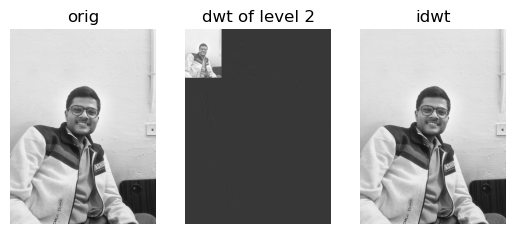

In [51]:
plt.subplot(1,3,1)
plt.title('orig')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title(f'dwt of level {level}')
plt.imshow(dwt_i, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('idwt')
plt.imshow(idwt_i, cmap='gray')
plt.axis('off')
plt.show()